# ENSEMBLE TECHNIQUES PROJECT




Importing the neccessary libraries

In [122]:
## Necessary libraries are imported

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from scipy.stats import zscore
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import os

# Step 1: Analyze The Data 

In [123]:
# Load the Dataset

df = pd.read_csv('DataParkinsons.csv')
df.head()

,﻿Name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [124]:
# Shape of dataframe

df.shape

(195, 24)

In [125]:
# Data types in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
﻿Name               195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [126]:
# Total number of missing values in dataframe
df.isnull().sum()

﻿Name               0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Thus we checked that there are no missing values in the data frame.



In [127]:
# 5-Point Summary of Numerical Attributes

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [38]:
# univariant analysis: Obsevation based on describe function above:
# ----------------------------------------------------------------

# For following Attributes: 
# MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DD, 
# MDVP:Shimmer, MDVP:Shimmer(dB), MDVP:APQ, Shimmer:DDA, NHR, PPE
# For these attributes mean is slightly higher than median.. 
# data is tailed more toward right.. Q3 and Max difference is significanlty large compared to Q1 and Min difference...

# For attributes: Shimmer:APQ3, Shimmer:APQ5 : 
# mean is slightly higher that median and data is sligtly right tailed

# For Attributes: HNR
# mean is lessor than median and data is slightly tailed towards left side.

# For attributes: RPDE, DFA, spread1, spread2, D2 : 
# data looks normal having mean and median nearly same..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6309244E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F684EDCE80>]], dtype=object)

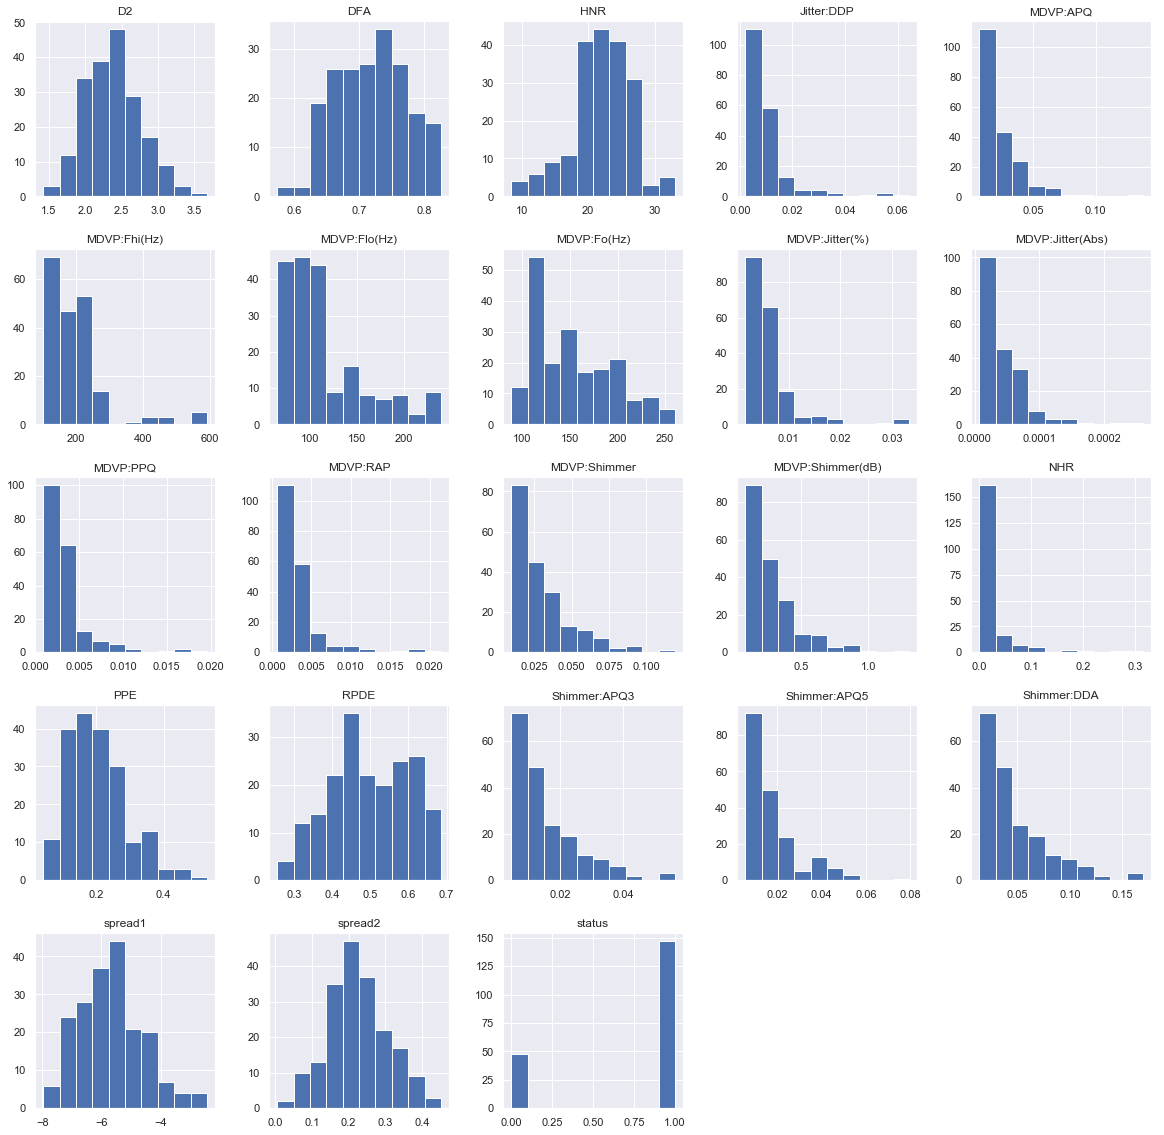

In [128]:
# perform univariant analysis by generating histogram of all dimensions
df.hist(figsize = [20,20])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F68582A9B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F6850FE438>], dtype=object)

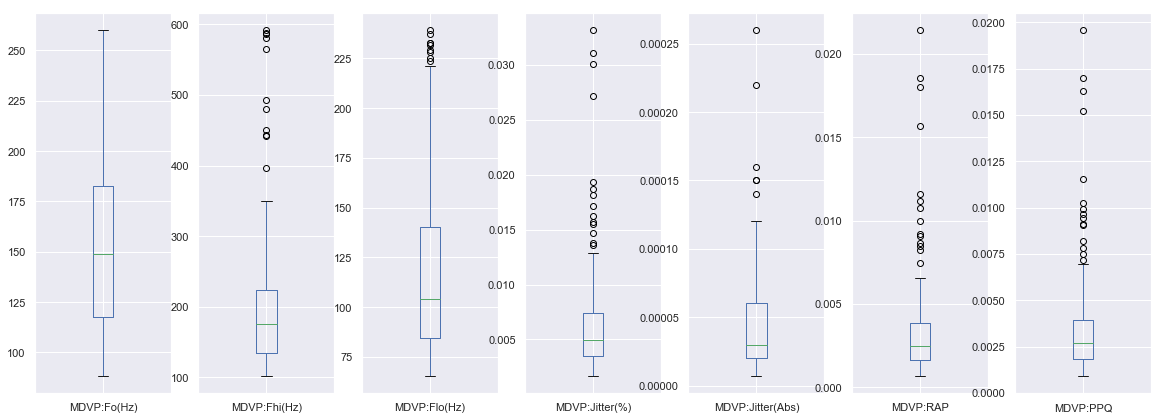

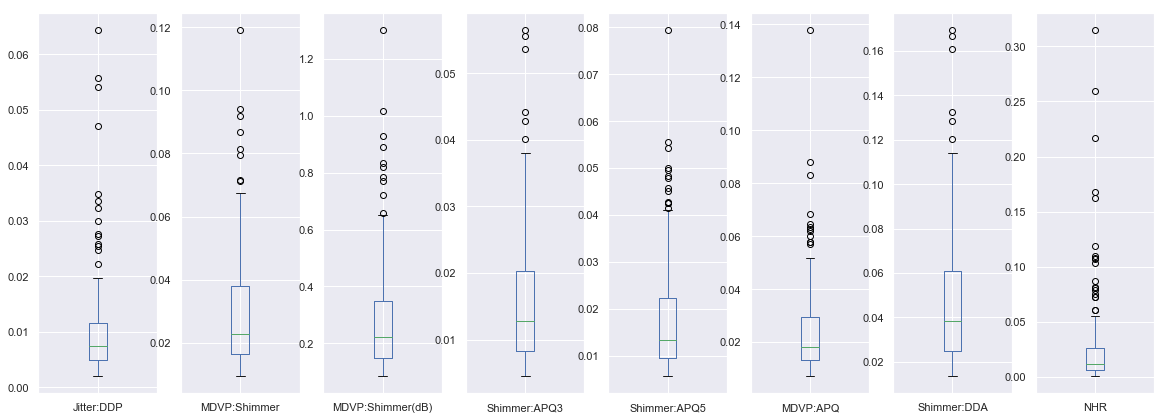

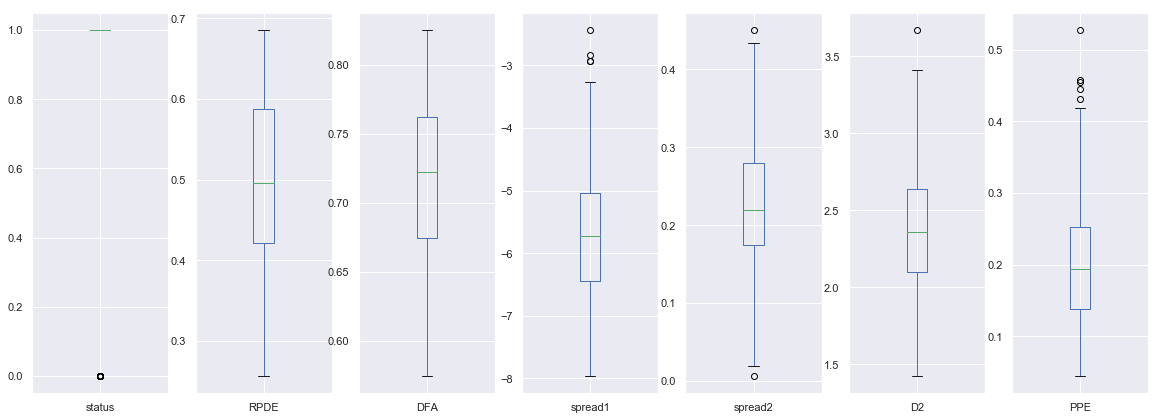

In [129]:
# plot box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
df.iloc[:,0:8].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df.iloc[:,8:16].plot(kind="box",subplots = True, ax=ax)

fig, ax = plt.subplots(figsize=(20,7))
df.iloc[:,17:24].plot(kind="box",subplots = True, ax=ax)

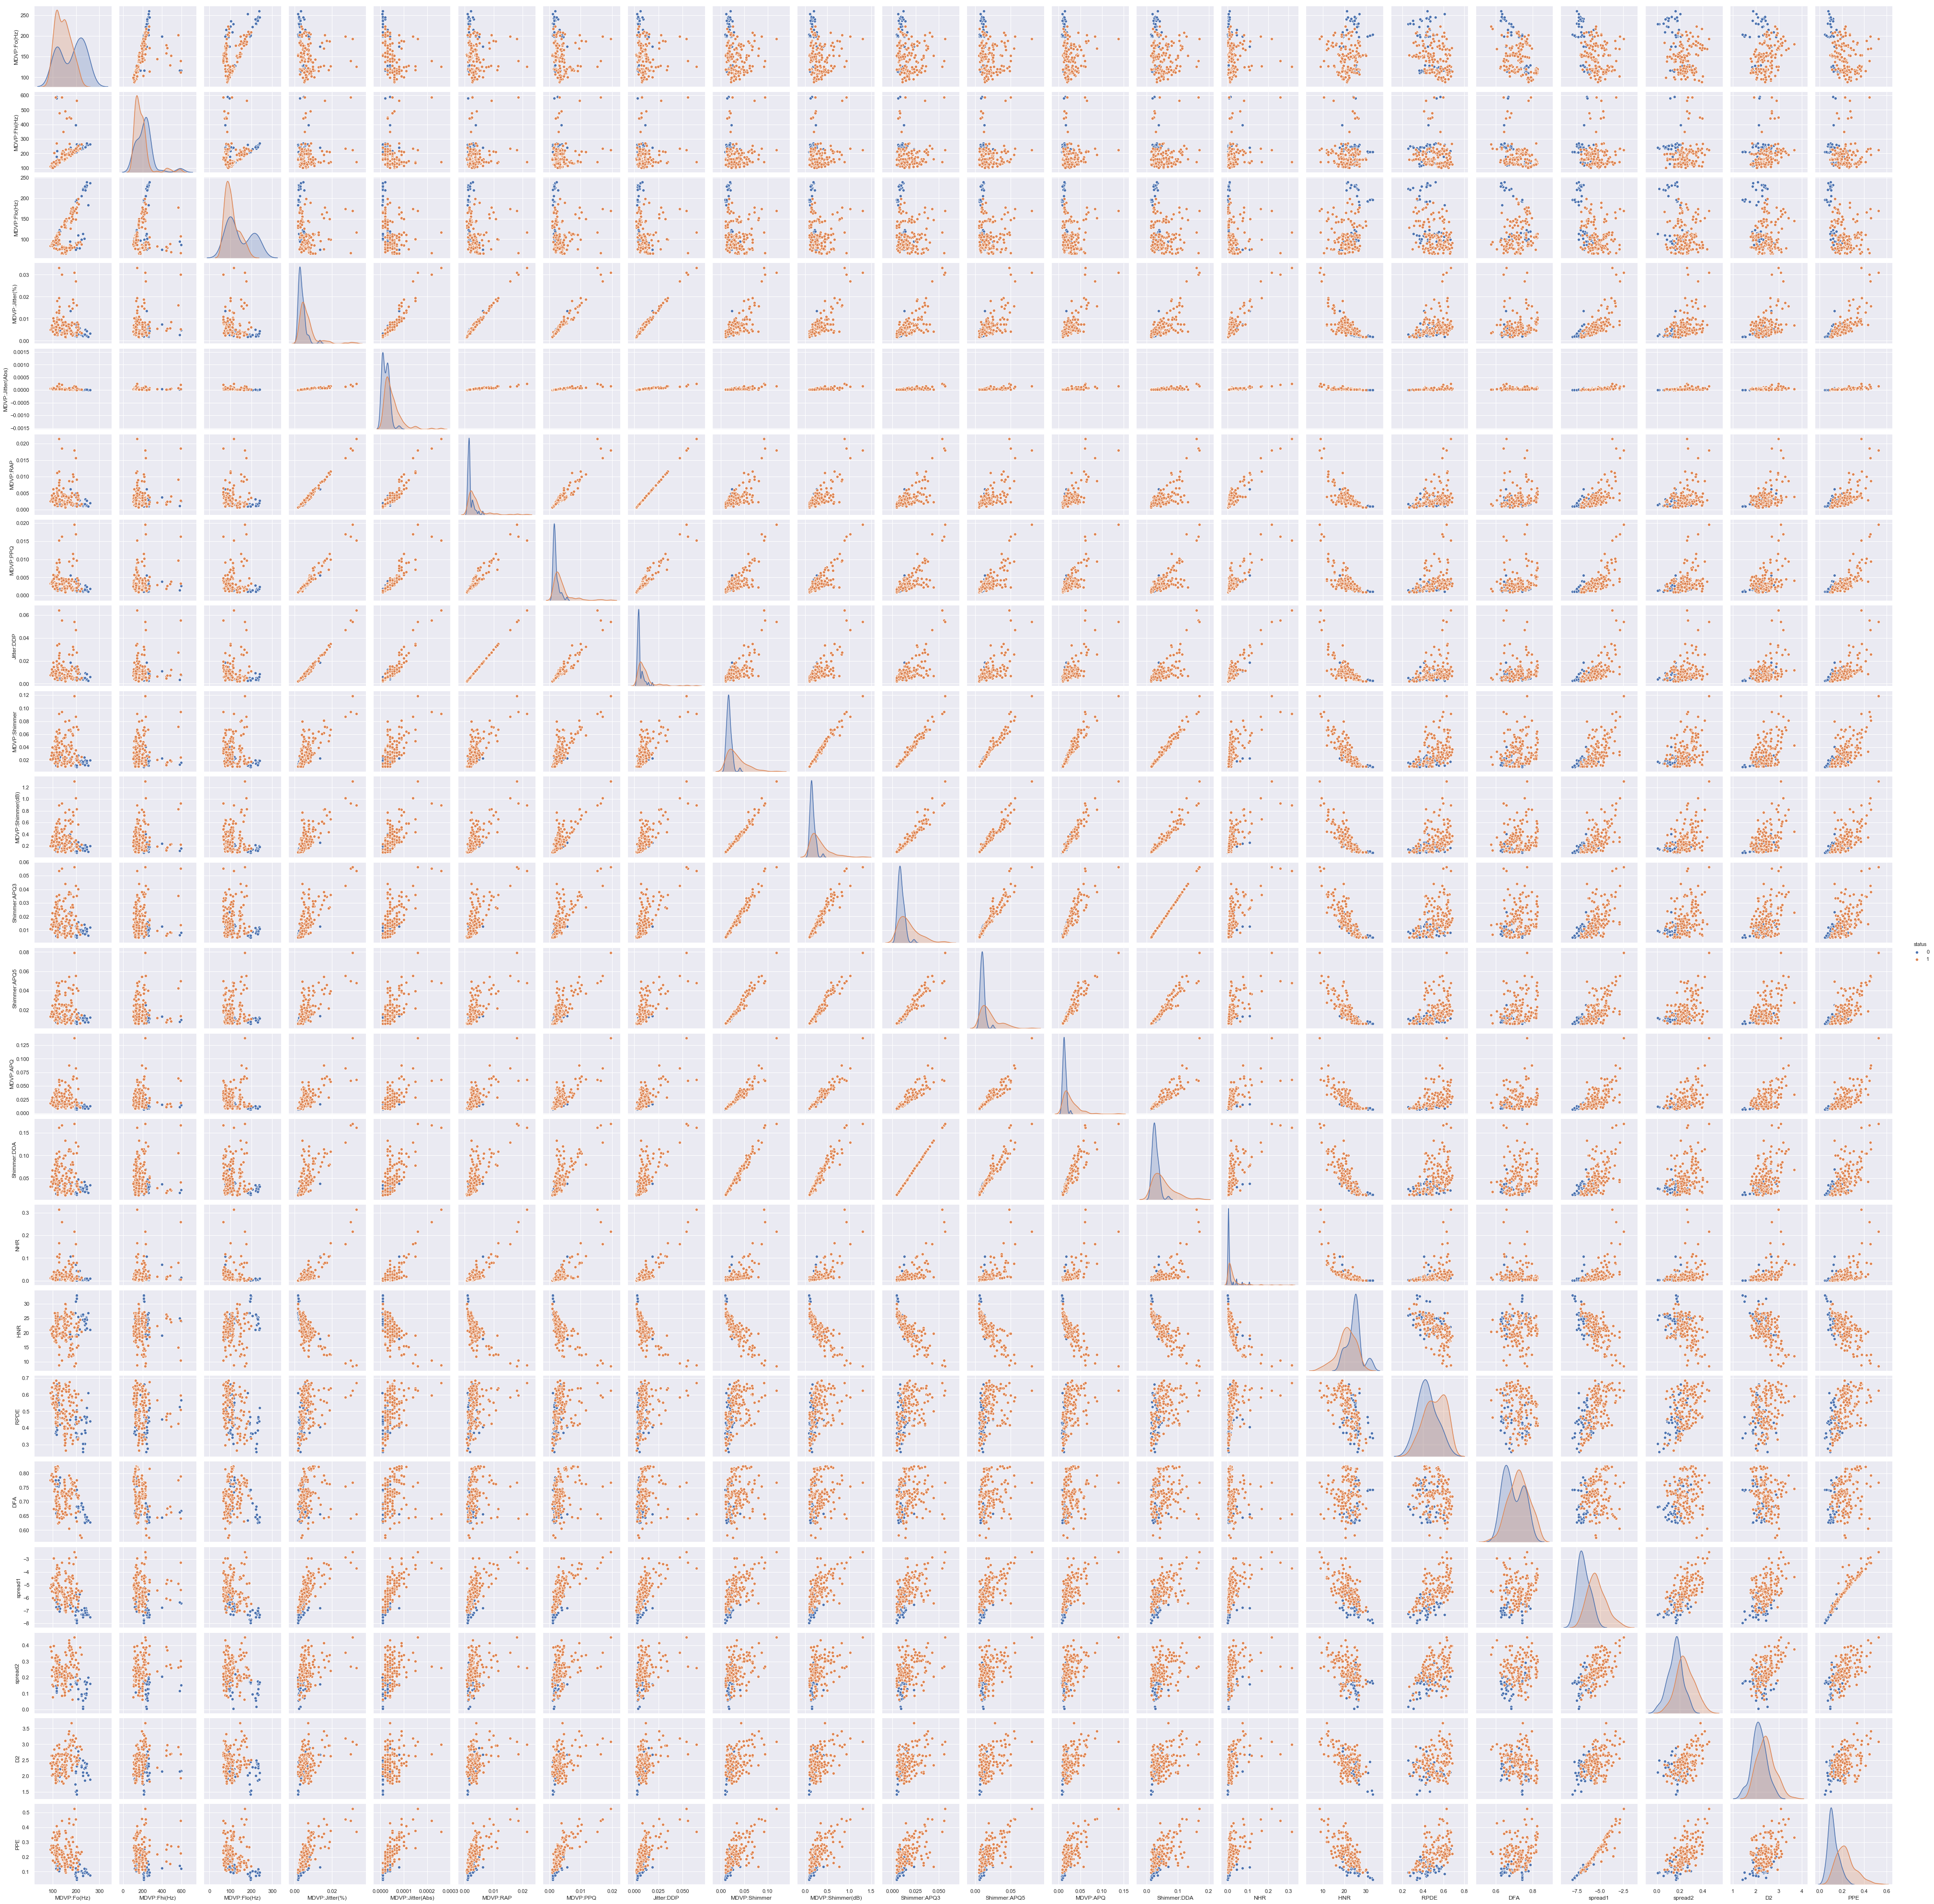

In [130]:
# bivariable analysis
sns.pairplot(df,diag_kind="kde", hue="status")

OBSERVATIONS:

- The distributions are more separable on some dimensions such as spread1, spread2, PPE, D2, PPE
- Attributes with multi gausian distributions: MDVP:Fo(Hz), MDVP:Flo(Hz), DFA
- MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), HNR - negative coorelation with target variable

In [131]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


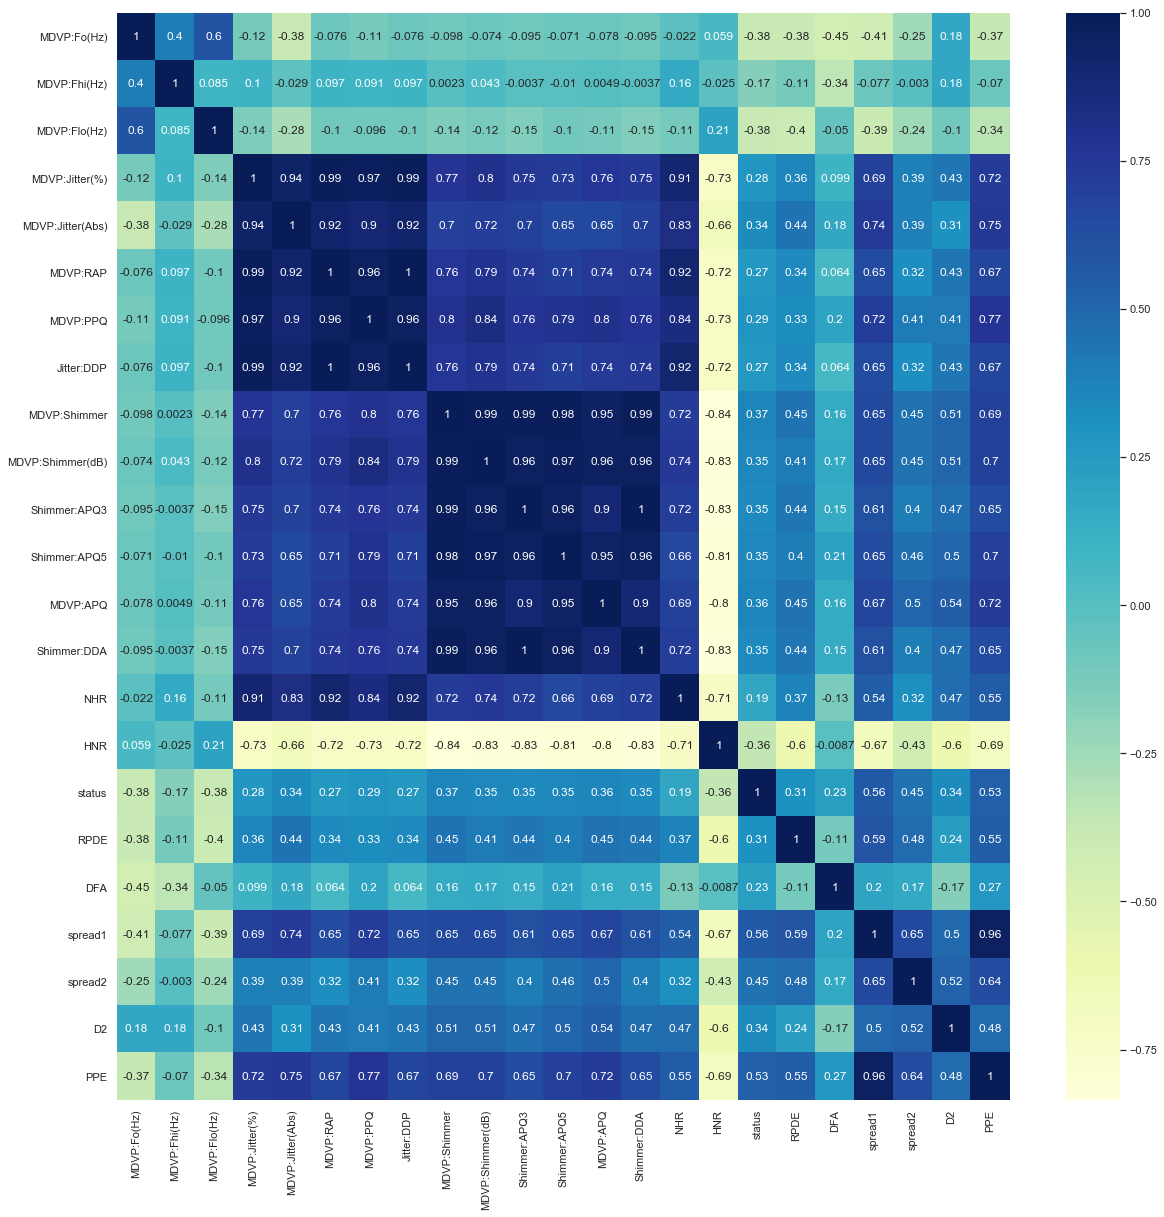

In [132]:
#Correlation analysis using heat map
f, ax = plt.subplots(figsize=(20, 20))
sns.set()
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')


OBSERVATIONS:

- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),
                 Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA and NHR are highly correlated 
- Above mentioned attributes are also right skewed by having large values may consider to be an outlier
- The status attributes are bimodal they have two peaks.
- The status 0 and 1 overlaps each other making it difficult for model to distinguish their properties to classify

In [133]:
# Measure of Skewness of columns:

df.skew(axis=0)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

NOTE:

A skewness value of 0 in the output denotes a symmetrical distribution.

A negative skewness value indicates an asymmetry in the distribution and the tail is larger towards the left hand side of the distribution.

A positive skewness value indicates an asymmetry in the distribution and the tail is larger towards the right hand side of the distribution.



# Split Data Into 70:30 Ratio

In [134]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y =  df.pop(df.columns[17])
X =  df.drop(df.columns[[0,17]], axis=1)

X_std = StandardScaler().fit_transform(X)
train_set, test_set, train_labels, test_labels = train_test_split(X_std, y, test_size=0.30, random_state=2)


# Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(train_set,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
predict = logmodel.predict(test_set)
predictProb = logmodel.predict_proba(test_set)

In [139]:
# Classification Report
print(classification_report(test_labels, predict))
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels, predict)
print(acc)

              precision    recall  f1-score   support

           0       0.36      0.42      0.38        12
           1       0.84      0.81      0.83        47

   micro avg       0.73      0.73      0.73        59
   macro avg       0.60      0.61      0.61        59
weighted avg       0.75      0.73      0.74        59

0.728813559322


# KNN

In [140]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [143]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_set, train_labels)
    
    # Predict the response
    Y_Pred = knn.predict(test_set)
    
    # Evaluate accuracy
    scores = accuracy_score(test_labels, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


In [144]:
knn = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric = 'euclidean')
knn.fit(train_set, train_labels)    
predicted = knn.predict(test_set)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_labels, predicted)
print(acc)

0.966101694915


Text(0, 0.5, 'Misclassification Error')

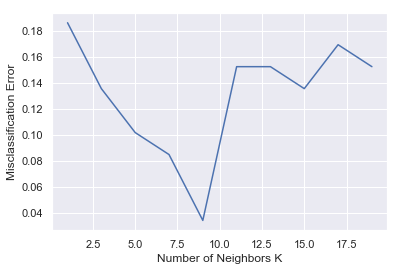

In [145]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

In [146]:
# Classification Report
print(classification_report(test_labels, predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.98      0.98      0.98        47

   micro avg       0.97      0.97      0.97        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.97      0.97      0.97        59



# Naive Bayes

In [147]:
# Model
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.64406779661016944

In [148]:
# Classififcation Report
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.36      1.00      0.53        12
           1       1.00      0.55      0.71        47

   micro avg       0.64      0.64      0.64        59
   macro avg       0.68      0.78      0.62        59
weighted avg       0.87      0.64      0.68        59



# Decision Tree Classifier

In [163]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [171]:
print(dTree.score(test_set, test_labels))

0.762711864407


#Ensemble Technique - Bagging

In [165]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(train_set, train_labels)

In [169]:

print(bgcl.score(test_set , test_labels))

0.813559322034


# Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(train_set, train_labels)
print(rfcl.score(test_set, test_labels))

0.779661016949


# Model Comparison

OBSERVATIONS:

- KNN classifier works best for this dataset with 96.6% accuracy.
- Ensemble Techniques like Bagging (81.4%) and Random Forest Classifier (77.9%) provides higher accuracy than the decision tree meta classifier (76.3%)